### Програмна реалізація та аналіз нерекурсивних та рекурсивних цифрових фільтрів
#### &copy; М.Є. Фриз, Б.Б. Млинко

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse, lfilter, periodogram

plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.rcParams['axes.grid'] = True

#### Приклад нерекурсивного (трансверсального) фільтра 4-го порядку

`y = lfilter(b, [1], x)`

`b` - вектор параметрів фільтра (array_like)

`x` - вхідний сигнал (array_like)

`y` - сигнал на виході фільтра (array)

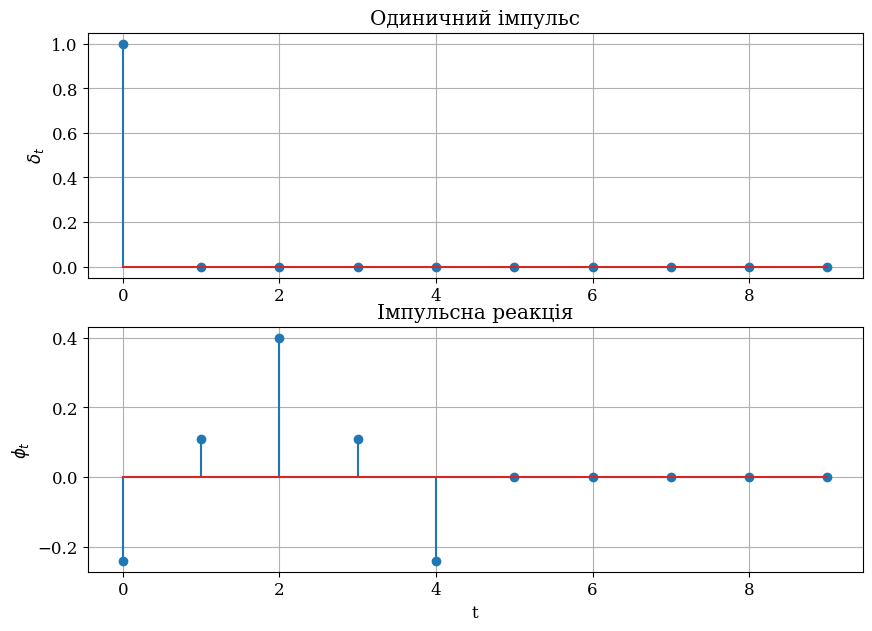

In [2]:
# задаємо параметри фільтра 
b = [-0.24, 0.11, 0.4, 0.11, -0.24]

# отримуємо імпульсну реакцію - вихідний сигнал фільтра, якщо на вході - одиничний імпульс
x = unit_impulse(10)     # одиничний імпульс
y = lfilter(b, [1], x)   # імпульсна реакція

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].stem(x)
ax[0].set(ylabel='$ \delta_t$', title='Одиничний імпульс')

ax[1].stem(y)
ax[1].set(xlabel='t', ylabel='$ \phi_t$', title='Імпульсна реакція')

plt.show()

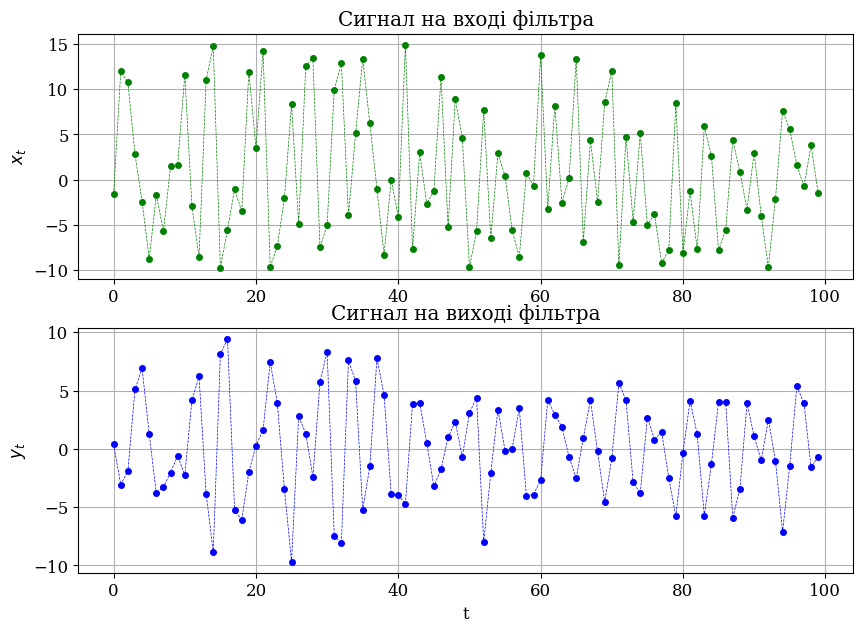

In [3]:
# сигнал на вході фільтра (із заданого файлу Lb5_1.prn)
x = np.loadtxt('Lb5_1.prn')

# сигнал на виході фільтра
y = lfilter(b, [1], x)

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(x[0:100], 'go--', linewidth=0.5, markersize=4)
ax[0].set(ylabel='$x_t$', title='Сигнал на вході фільтра')

ax[1].plot(y[0:100], 'bo--', linewidth=0.5, markersize=4)
ax[1].set(xlabel='t', ylabel='$y_t$', title='Сигнал на виході фільтра')

plt.show()

In [4]:
# амплітудно-частотна характеристика нерекурсивного фільтра 4-го порядку

w = np.linspace(0, np.pi, 100)

def H(w):
    return b[0] + b[1]*np.exp(-1j*w)+b[2]*np.exp(-1j*2*w)+b[3]*np.exp(-1j*3*w)+b[4]*np.exp(-1j*4*w)


# оцінки спектральної щільності потужності сигналу на вході і на виході фільтра періодограмним методом

f_x, psd_x = periodogram(x, window='tukey')
f_y, psd_y = periodogram(y, window='tukey')

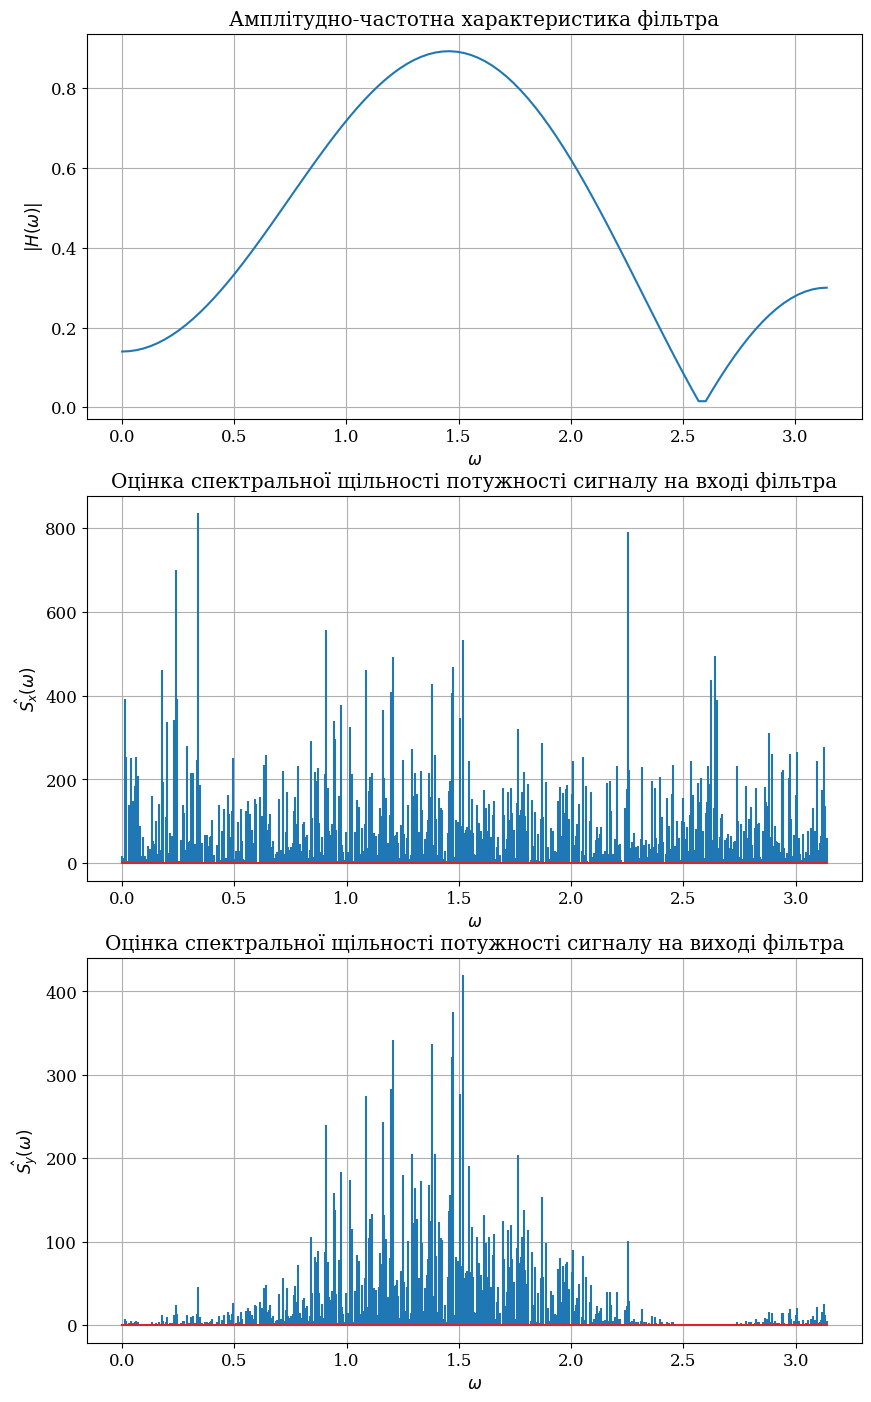

In [5]:
# візуалізація результатів

fig, ax = plt.subplots(3, 1, figsize = (10, 17))

ax[0].plot(w, np.abs(H(w)))
ax[0].set(xlabel='$ \omega$', ylabel='$ |H( \omega )| $', title = 'Амплітудно-частотна характеристика фільтра')


ax[1].stem(2*np.pi*f_x, psd_x, markerfmt = ' ')
ax[1].set(xlabel = '$ \omega$', ylabel='$ \hat{S_x} ( \omega ) $', title='Оцінка спектральної щільності потужності сигналу на вході фільтра')

ax[2].stem(2*np.pi*f_y, psd_y, markerfmt = ' ')
ax[2].set(xlabel= '$ \omega$', ylabel='$ \hat{S_y} ( \omega ) $', title='Оцінка спектральної щільності потужності сигналу на виході фільтра')

plt.show()

#### Приклад рекурсивного фільтра 2-го порядку

`y = lfilter([1], a, x)`

`a` - вектор параметрів фільтра (array_like), a[0] = 1 !!!

`x` - вхідний сигнал (array_like)

`y` - сигнал на виході фільтра (array)

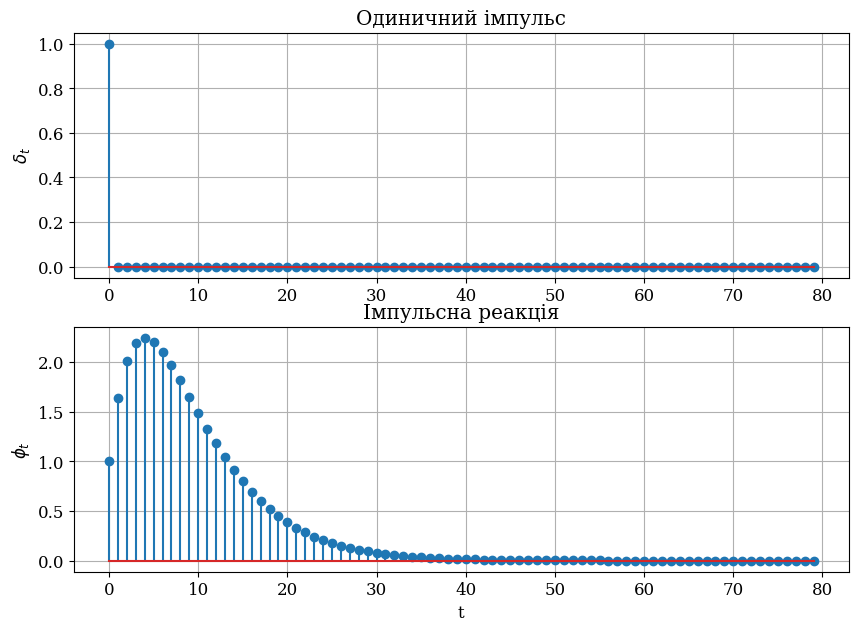

In [6]:
# задаємо параметри фільтра 
a = [1, -1.6375, 0.6703]

# отримуємо імпульсну реакцію - вихідний сигнал фільтра, якщо на вході - одиничний імпульс
x = unit_impulse(80)     # одиничний імпульс
y = lfilter([1], a, x)   # імпульсна реакція

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].stem(x)
ax[0].set(ylabel='$ \delta_t$', title='Одиничний імпульс')

ax[1].stem(y)
ax[1].set(xlabel='t', ylabel='$ \phi_t$', title='Імпульсна реакція')

plt.show()

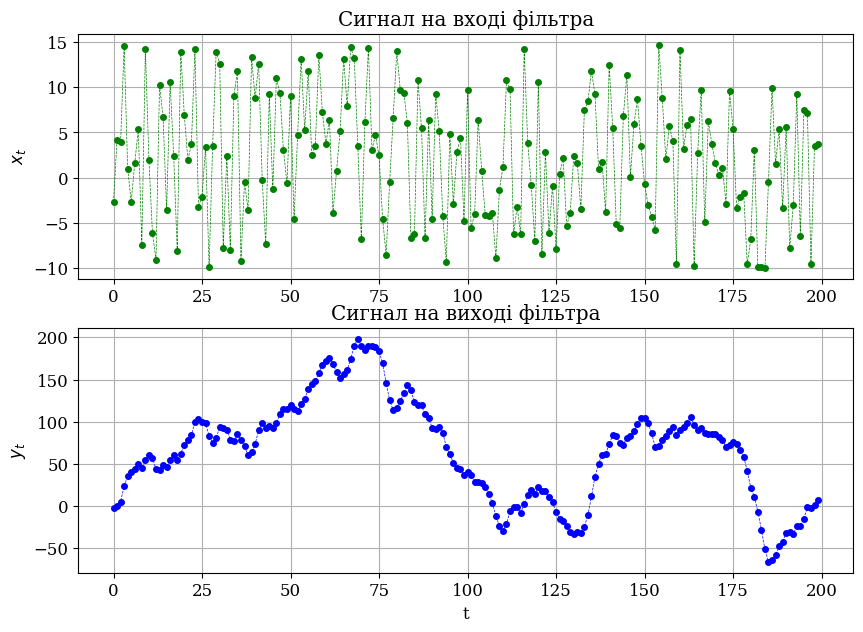

In [7]:
# сигнал на вході фільтра (із заданого файлу Lb5_2.prn)
x = np.loadtxt('Lb5_2.prn')

# синал на виході фільтра
y = lfilter([1], a, x)

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(x[0:200], 'go--', linewidth=0.5, markersize=4)
ax[0].set(ylabel='$x_t$', title='Сигнал на вході фільтра')

ax[1].plot(y[0:200], 'bo--', linewidth=0.5, markersize=4)
ax[1].set(xlabel='t', ylabel='$y_t$', title='Сигнал на виході фільтра')

plt.show()

In [8]:
# амплітудно-частотна характеристика рекурсивного фільтра 2-го порядку

w = np.linspace(0, np.pi, 100)

def H(w):
    return 1 / (1 + a[1]*np.exp(-1j*w)+a[2]*np.exp(-1j*2*w))


# оцінки спектральної щільності потужності сигналу на вході і на виході фільтра періодограмним методом

f_x, psd_x = periodogram(x, window='tukey')
f_y, psd_y = periodogram(y, window='tukey')

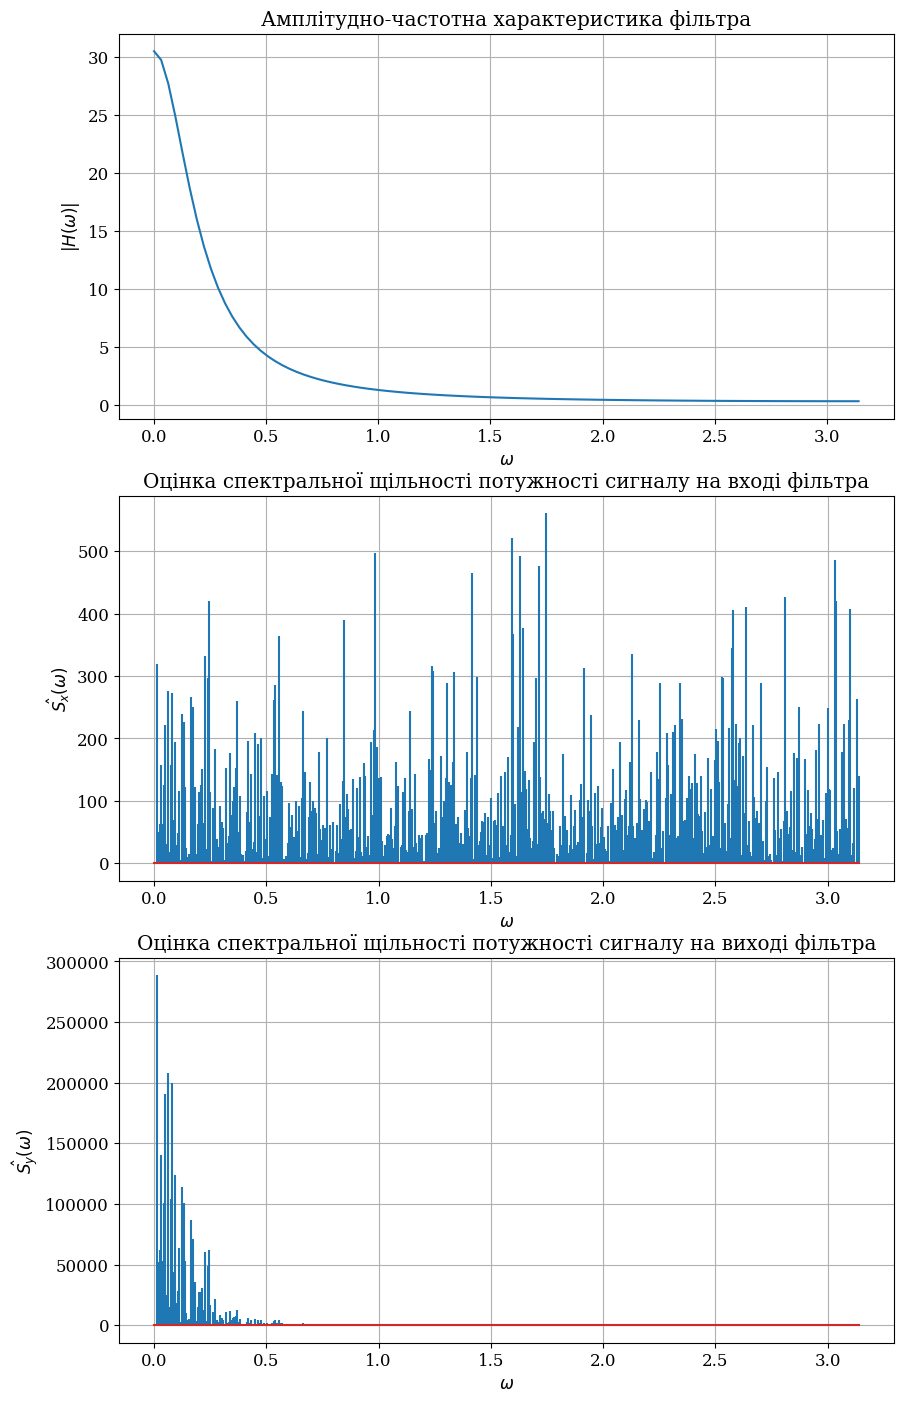

In [9]:
# візуалізація результатів

fig, ax = plt.subplots(3, 1, figsize = (10, 17))

ax[0].plot(w, np.abs(H(w)))
ax[0].set(xlabel='$ \omega$', ylabel='$ |H( \omega )| $', title = 'Амплітудно-частотна характеристика фільтра')


ax[1].stem(2*np.pi*f_x, psd_x, markerfmt = ' ')
ax[1].set(xlabel = '$ \omega$', ylabel='$ \hat{S_x} ( \omega ) $', title='Оцінка спектральної щільності потужності сигналу на вході фільтра')

ax[2].stem(2*np.pi*f_y, psd_y, markerfmt = ' ')
ax[2].set(xlabel= '$ \omega$', ylabel='$ \hat{S_y} ( \omega ) $', title='Оцінка спектральної щільності потужності сигналу на виході фільтра')

plt.show()